In [1]:
%pylab inline
import visitviewer
import glob

Populating the interactive namespace from numpy and matplotlib


# JWST Visit Viewer

* [Introduction](#Introduction)
* [Usage from Python](#Usage-from-Python)
* [Command line usage](#Command-line-usage)

## Introduction

`visitviewer` is a tool to display and visualize the pointings for JWST visit files, such as are produced by OPGS based on APT files for upload to the observatory, where they will be used by the OSS Executive to orchestrate observations. 

The main point of this tool is to make it easy to visualize where in the sky a given visit will be pointed, the observatory attitude with respect to the sun and the field of regard constraints, and which detector(s) will be used to take data. 

This tool works by: 
 - Parsing the visit file for relevant information
 - Retrieving a 2MASS K image from Vizier. (This is cached for efficient reuse if you replot a given visit again)
 - And making some plots.
 
## Usage from Python 
 
 Usage is relatively simple:

File saved to V00747016001_view.pdf


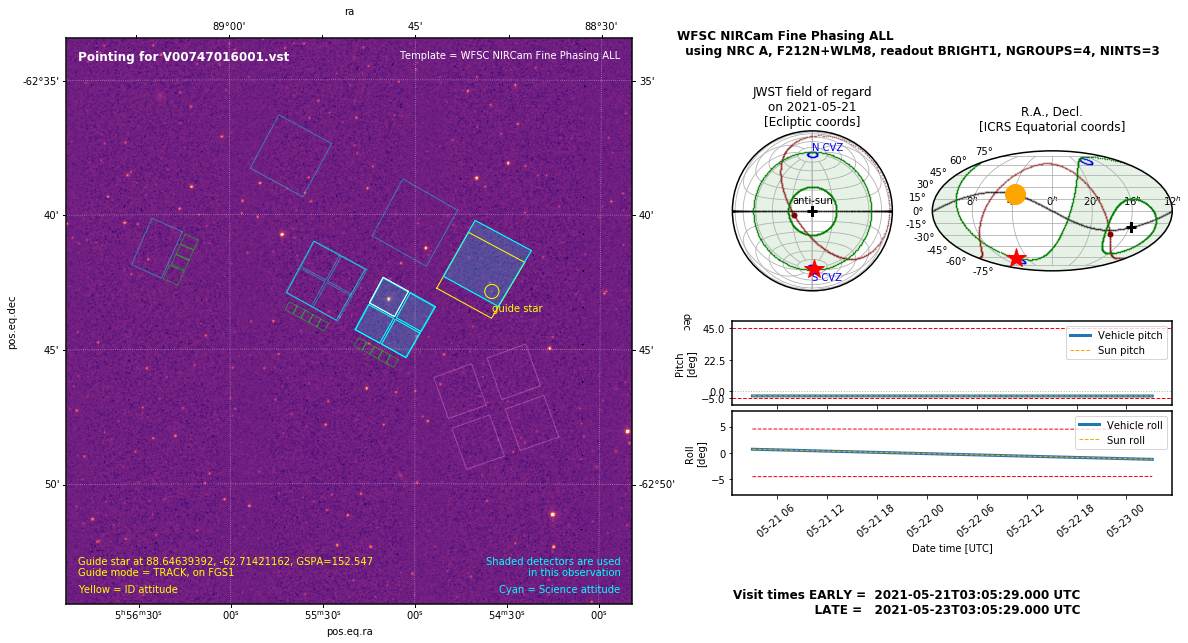

In [2]:
visitviewer.view("../examples/V00747016001.vst")

You can save the results to a PDF if desired:

File saved to V00741066001_view.pdf


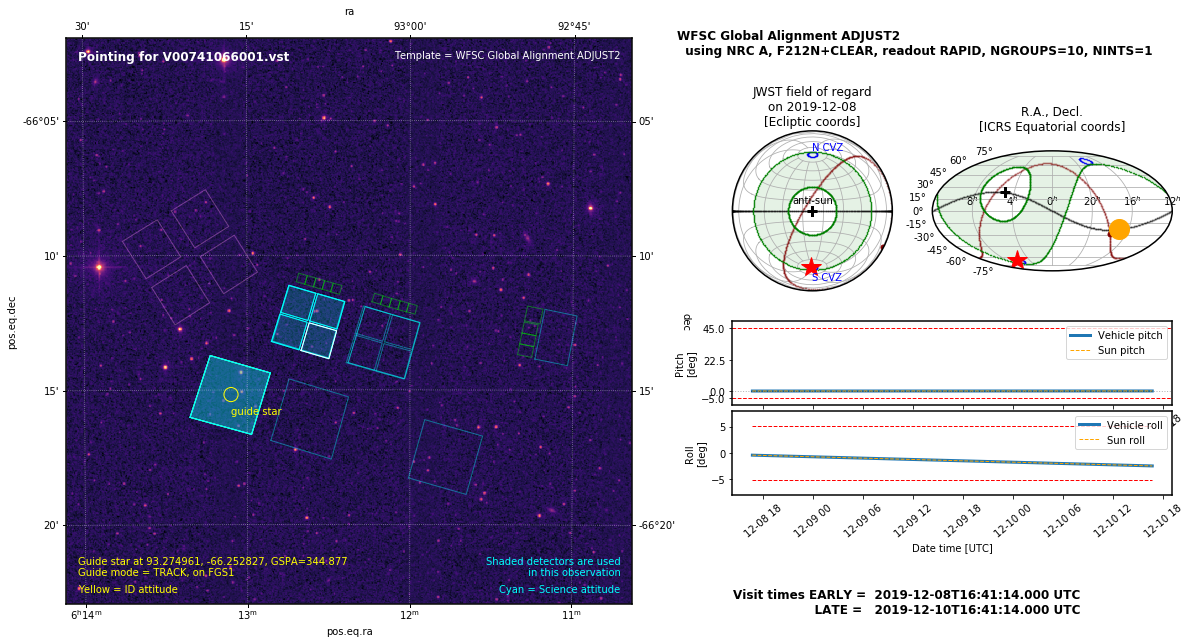

In [3]:
visitviewer.view("../examples/V00741066001.vst", save=True)

## Command line usage

From the Unix/Linux/macOS command line, you can in